In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle
# Plotting libraries
!pip install gcsfs
!pip install vaex
!pip install scikit-learn numpy
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import tensorflow as tf
import vaex
# Sklearn libraries
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# Filter warnings
warnings.filterwarnings('ignore') #filter warnings
# Show plots inline
%matplotlib inline
!pip install -U klib
import klib
!pip install matplotlib==3.1.3

  Using cached vaex-4.16.0-py3-none-any.whl (4.7 kB)
  Using cached vaex_astro-0.9.3-py3-none-any.whl (20 kB)
  Using cached vaex_viz-0.5.4-py3-none-any.whl (19 kB)
  Using cached vaex_jupyter-0.8.1-py3-none-any.whl (43 kB)
  Using cached vaex_ml-0.18.1-py3-none-any.whl (58 kB)
  Using cached vaex_hdf5-0.14.1-py3-none-any.whl (16 kB)
  Using cached vaex_core-4.16.1-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached vaex_server-0.8.1-py3-none-any.whl (23 kB)
  Using cached blake3-0.3.3-cp39-none-win_amd64.whl (208 kB)
  Using cached progressbar2-4.2.0-py2.py3-none-any.whl (27 kB)
  Using cached aplus-0.11.0.tar.gz (3.7 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



ModuleNotFoundError: No module named 'vaex'

In [2]:
df = pd.read_csv(r"D:\DATASET\2ND_NEW_ML-EdgeIIoT-dataset.csv")

In [3]:
df.head()

,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.syn,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.seq,tcp.srcport,Attack_label,Attack_type
0,1,3108484685,52838,0,80,24,1,34,1,54518,1,DDoS_HTTP
1,1,2302303704,34322,0,80,24,1,38,1,54538,1,DDoS_HTTP
2,28,1389321969,60619,0,54622,16,1,0,1,80,1,DDoS_HTTP
3,33,2272282626,38986,0,54642,16,1,0,1,80,1,DDoS_HTTP
4,28,2940209540,47386,0,54646,16,1,0,1,80,1,DDoS_HTTP


<AxesSubplot:title={'center':'Class Distribution'}, ylabel='None'>

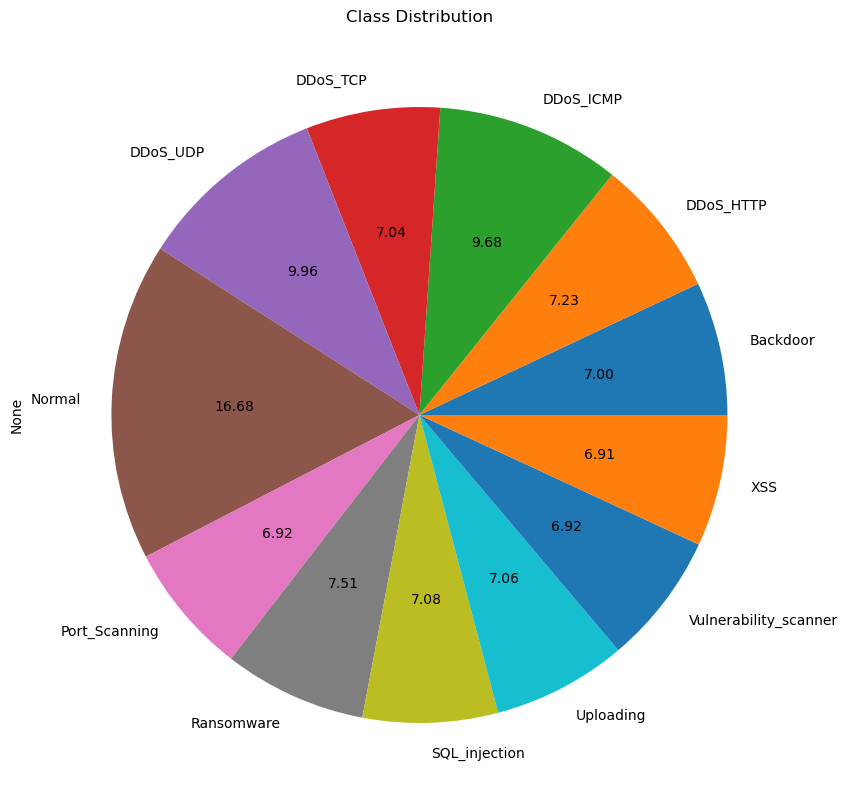

In [4]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("Attack_type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [5]:
print("Class Distribution")

Class Distribution


In [6]:
#shuffle rows of dataframe 
sampler=np.random.permutation(len(df))
data=df.take(sampler)
df.head()

,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.syn,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.seq,tcp.srcport,Attack_label,Attack_type
0,1,3108484685,52838,0,80,24,1,34,1,54518,1,DDoS_HTTP
1,1,2302303704,34322,0,80,24,1,38,1,54538,1,DDoS_HTTP
2,28,1389321969,60619,0,54622,16,1,0,1,80,1,DDoS_HTTP
3,33,2272282626,38986,0,54642,16,1,0,1,80,1,DDoS_HTTP
4,28,2940209540,47386,0,54646,16,1,0,1,80,1,DDoS_HTTP


In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(['Attack_type'], axis=1)
y = df.filter(['Attack_type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time

C:\Users\Ebuka\AppData\Local\Temp\ipykernel_11588\3246578897.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


                       precision    recall  f1-score   support

             Backdoor       1.00      0.97      0.99      2048
            DDoS_HTTP       0.88      0.87      0.87      2076
            DDoS_ICMP       0.76      1.00      0.86      2827
             DDoS_TCP       1.00      1.00      1.00      2010
             DDoS_UDP       1.00      0.90      0.94      2896
               Normal       1.00      1.00      1.00      4854
        Port_Scanning       1.00      0.90      0.95      2024
           Ransomware       1.00      0.90      0.95      2230
        SQL_injection       0.93      0.91      0.92      2139
            Uploading       0.95      0.92      0.93      1990
Vulnerability_scanner       0.99      0.99      0.99      2030
                  XSS       0.90      0.91      0.91      1984

             accuracy                           0.94     29108
            macro avg       0.95      0.94      0.94     29108
         weighted avg       0.95      0.94      0.95 

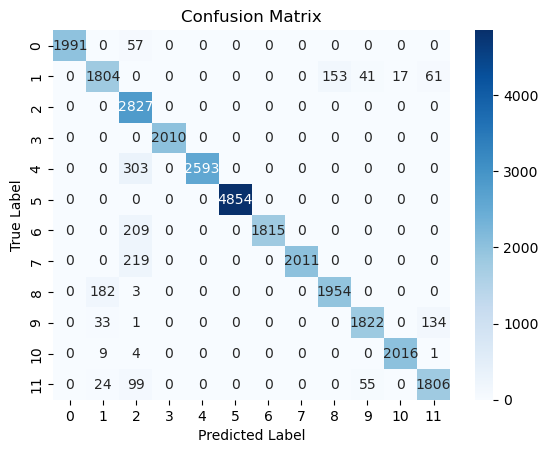

In [9]:
#from cleverhans.future.tf2.attacks import fast_gradient_method
# Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) 
end_time = time.time()
computational_time =  end_time - start_time


y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Computational time: {computational_time:.2f} seconds')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


#plot_confusion_matrix(rf, X_test, y_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Cross-Validation Accuracy Scores:
[0.94211611 0.94495019 0.94108048 0.94400069 0.94365713 0.94408658
 0.94812334 0.94400069 0.94735034 0.94400069]
Mean Accuracy: 0.9443
Standard Deviation: 0.0020
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                       precision    recall  f1-score   support

             Backdoor       1.00      0.97      0.99      2048
            DDoS_HTTP       0.89      0.89      0.89      2076
            DDoS_ICMP       0.76      1.00      0.86      2827
             DDoS_TCP       1.00      1.00      1.00      2010
             DDoS_UDP       1.00      0.90      0.94      2896
               Normal       1.00      1.00      1.00      4854
        Port_Scanning       1.00      0.90      0.95      2024
           Ransomware       1.00      0.90      0.95      2230
        SQL_injection       0.95      0.91      0.93      2139
            Uploading       0.96      0.91      0.93      1990
Vulnerability_scanner       0.99      0.99      0.99      2030
                  XSS       0.89      0.92      0.91      1984

             accuracy                           0.95     29108
            macro avg       0.95      0.94      0.94     29108
         weighted avg       0.95      0.95      0.95 

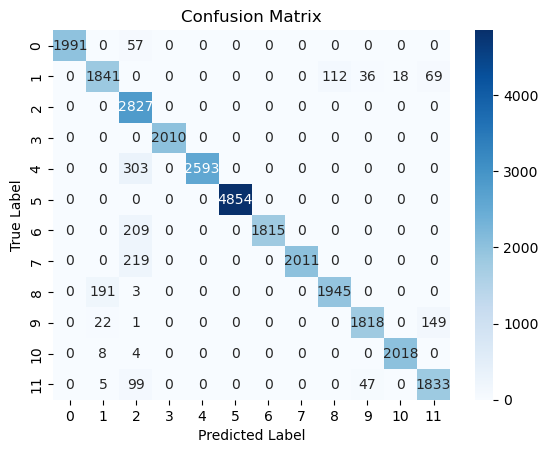

In [10]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import time

start_time = time.time()

lgbm = lgb.LGBMClassifier(
    n_estimators=100,
    random_state=42,
    bagging_freq=5,
    bagging_fraction=0.75
)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=10, scoring='accuracy')

end_time = time.time()
computational_time = end_time - start_time

print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

# Fit the model on the entire training data
lgbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgbm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate average detection time per sample
num_samples = len(X_test)
avg_detection_time = computational_time / num_samples

print(f"Computational time: {computational_time:.2f} seconds")
print(f"Average detection time per sample: {avg_detection_time:.6f} seconds")

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


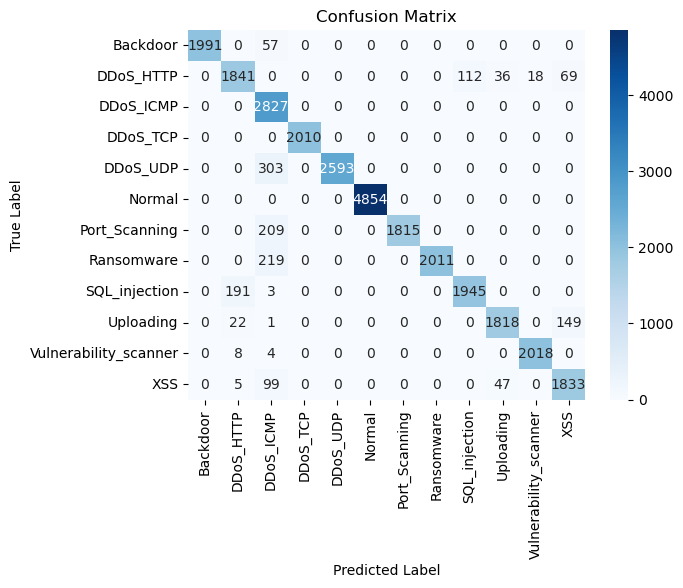

In [11]:
# Get the class labels from the dataset
class_labels = np.unique(np.concatenate((y_train, y_test), axis=0))

# Plot the confusion matrix using seaborn heatmap with class labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [11]:
#########################################CNN CODE CLASSIFIATION

In [12]:
X.shape

(145540, 11)

In [13]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [14]:
df.shape

(145540, 12)

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.utils import np_utils

# Encode the string labels to integers
label_encoder = LabelEncoder()
df['Attack_type'] = label_encoder.fit_transform(df['Attack_type'])

# Load the data
X = df.drop(['Attack_type'], axis=1).values.reshape(df.shape[0], 11, 1)
y = np_utils.to_categorical(df['Attack_type'])

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(11, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(12, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/40
3639/3639 [==============================] - 15s 4ms/step - loss: 369887.0000 - accuracy: 0.2617 - val_loss: 2.9003 - val_accuracy: 0.3345
Epoch 2/40
3639/3639 [==============================] - 13s 4ms/step - loss: 12.8846 - accuracy: 0.3363 - val_loss: 1.9094 - val_accuracy: 0.3581
Epoch 3/40
3639/3639 [==============================] - 13s 4ms/step - loss: 1.8529 - accuracy: 0.3705 - val_loss: 1.7721 - val_accuracy: 0.3771
Epoch 4/40
3639/3639 [==============================] - 13s 4ms/step - loss: 1.7813 - accuracy: 0.3905 - val_loss: 1.7277 - val_accuracy: 0.3764
Epoch 5/40
3639/3639 [==============================] - 12s 3ms/step - loss: 1.6950 - accuracy: 0.4114 - val_loss: 1.7245 - val_accuracy: 0.3484
Epoch 6/40
3639/3639 [==============================] - 12s 3ms/step - loss: 1.6543 - accuracy: 0.4225 - val_loss: 1.6726 - val_accuracy: 0.3841
Epoch 7/40
3639/3639 [==============================] - 14s 4ms/step - loss: 189.3232 - accuracy: 0.4164 - val_loss: 1.7182 

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

# Read the dataset
df = pd.read_csv(r"D:\DATASET\2ND_NEW_ML-EdgeIIoT-dataset.csv")

# Drop rows with null values
df.dropna(inplace=True)

# Encode the string labels to integers
label_encoder = LabelEncoder()
df['Attack_type'] = label_encoder.fit_transform(df['Attack_type'])

# Convert categorical data into numerical data
df = pd.get_dummies(df)

# Split the data into X (features) and y (target)
X = df.drop('Attack_type', axis=1).values.reshape(df.shape[0], -1, 1)
y = np_utils.to_categorical(df['Attack_type'])

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/40
3639/3639 [==============================] - 16s 4ms/step - loss: 337694.4062 - accuracy: 0.2978 - val_loss: 3.9665 - val_accuracy: 0.3898
Epoch 2/40
3639/3639 [==============================] - 14s 4ms/step - loss: 2.8882 - accuracy: 0.3587 - val_loss: 1.8737 - val_accuracy: 0.4079
Epoch 3/40
3639/3639 [==============================] - 13s 4ms/step - loss: 86.6216 - accuracy: 0.4300 - val_loss: 1.6766 - val_accuracy: 0.4322
Epoch 4/40
3639/3639 [==============================] - 13s 4ms/step - loss: 1.6085 - accuracy: 0.4437 - val_loss: 1.5209 - val_accuracy: 0.4370
Epoch 5/40
3639/3639 [==============================] - 13s 4ms/step - loss: 495.4012 - accuracy: 0.4376 - val_loss: 1.6393 - val_accuracy: 0.4085
Epoch 6/40
3639/3639 [==============================] - 13s 4ms/step - loss: 14.5371 - accuracy: 0.4358 - val_loss: 1.6136 - val_accuracy: 0.4240
Epoch 7/40
3639/3639 [==============================] - 13s 4ms/step - loss: 1.6419 - accuracy: 0.4199 - val_loss: 1.7037

In [16]:
import seaborn as sns
! pip install shap
import shap
shap.initjs()

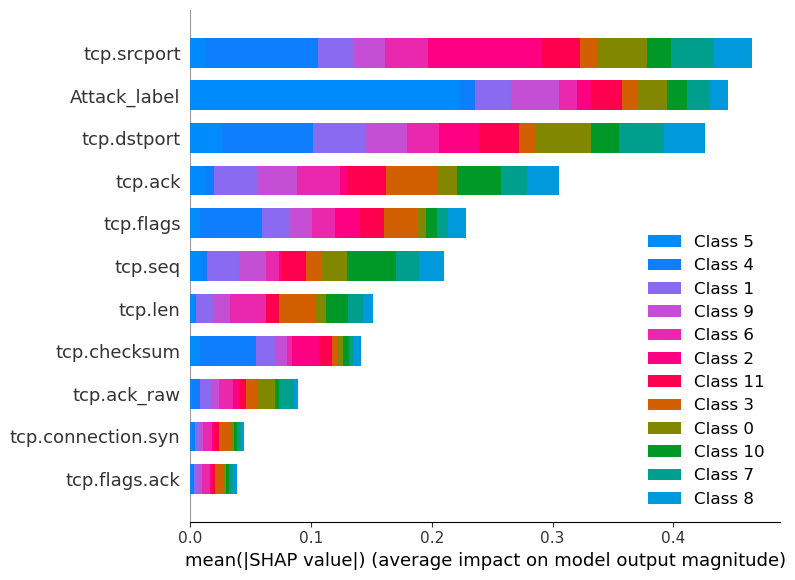

In [17]:
# Load the SHAP explainer
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for all samples in the test set
shap_values = explainer.shap_values(X_test)

# Use the summary plot to visualize the feature importance
shap.summary_plot(shap_values, X_test, plot_type='bar')

# Use the force plot to visualize the contribution of each feature for a particular prediction
# Select an index for the test set and generate a force plot for that sample
idx = 0

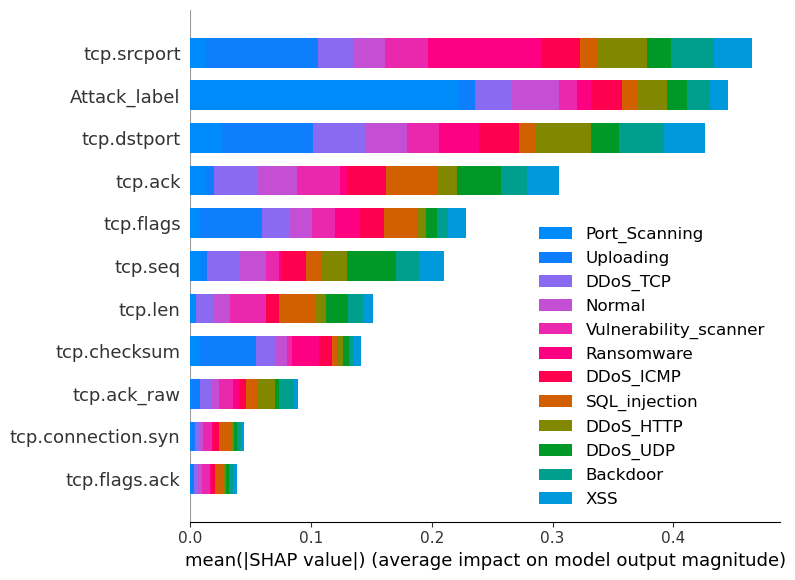

In [18]:
class_names = df['Attack_type'].unique().tolist()
shap.summary_plot(shap_values, X_test, class_names=class_names)


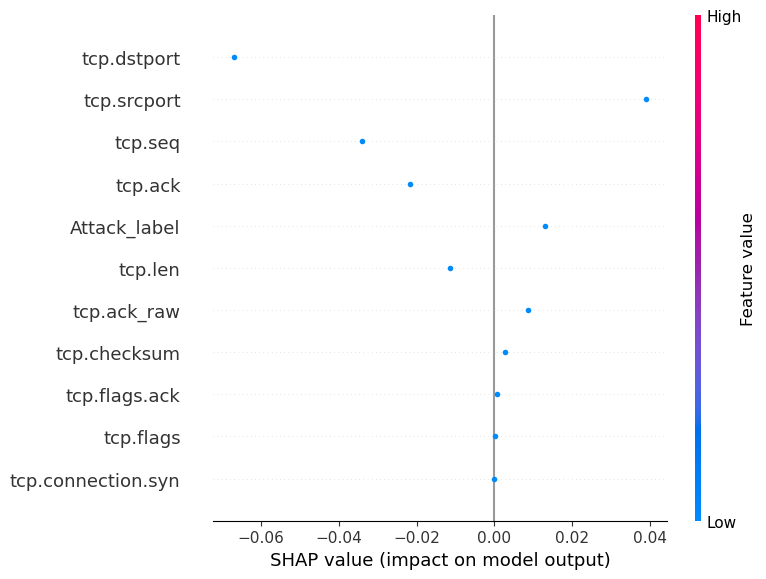

In [20]:
import shap

# Load the SHAP explainer
explainer = shap.TreeExplainer(rf)

# Select a single test data or row from your dataset
idx = 0
sample = X_test.iloc[[idx]]

# Calculate SHAP values for the selected sample
shap_values = explainer.shap_values(sample)

# Use the summary plot to visualize the feature importance
shap.summary_plot(shap_values[0], sample)

# Use the force plot to visualize the contribution of each feature for the selected prediction
shap.force_plot(explainer.expected_value[0], shap_values[0], sample)


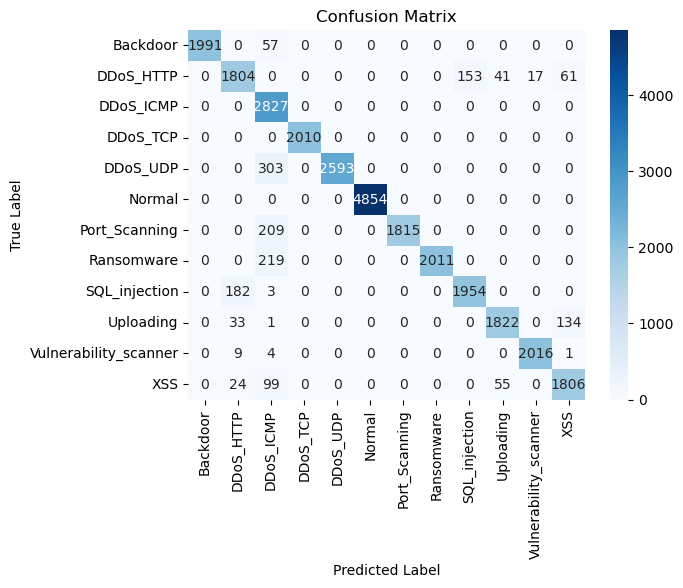

In [14]:
# Create the confusion matrix
categories = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=categories)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
###BINARY CLASSIFICATION OF NORMAL AND RANSOMWAWRE

In [29]:
df.head()

,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.syn,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.seq,tcp.srcport,Attack_label,Attack_type
0,1,3108484685,52838,0,80,24,1,34,1,54518,1,DDoS_HTTP
1,1,2302303704,34322,0,80,24,1,38,1,54538,1,DDoS_HTTP
2,28,1389321969,60619,0,54622,16,1,0,1,80,1,DDoS_HTTP
3,33,2272282626,38986,0,54642,16,1,0,1,80,1,DDoS_HTTP
4,28,2940209540,47386,0,54646,16,1,0,1,80,1,DDoS_HTTP


In [32]:

# Define the list of attack types to remove
attack_types_to_remove = ['XSS', 'Vulnerability_scanner', 'Uploading', 'SQL_injection', 'Port_Scanning', 'DDoS_UDP', 'DDoS_TCP', 'DDoS_ICMP', 'DDoS_HTTP', 'Backdoor']

# Filter out the rows containing the attack types to remove
new_df = df[~df['Attack_type'].isin(attack_types_to_remove)]

# Save the new dataset to a new CSV file
new_df.to_csv('my_filtered_dataset.csv', index=False)


<AxesSubplot:title={'center':'Class Distribution'}, ylabel='None'>

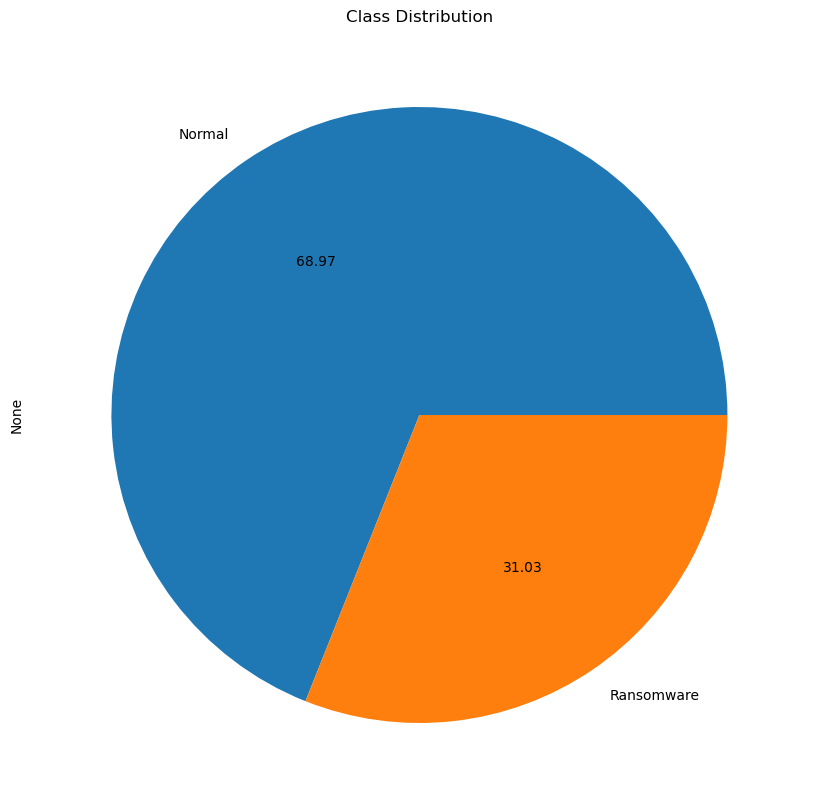

In [34]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
new_df.groupby("Attack_type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [35]:
new_df.shape[0]

35206

In [36]:
new_df.shape[1]

12

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop(['Attack_type'], axis=1)
y = df.filter(['Attack_type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


                       precision    recall  f1-score   support

             Backdoor       1.00      0.97      0.99      2048
            DDoS_HTTP       0.88      0.87      0.87      2076
            DDoS_ICMP       0.76      1.00      0.86      2827
             DDoS_TCP       1.00      1.00      1.00      2010
             DDoS_UDP       1.00      0.90      0.94      2896
               Normal       1.00      1.00      1.00      4854
        Port_Scanning       1.00      0.90      0.95      2024
           Ransomware       1.00      0.90      0.95      2230
        SQL_injection       0.93      0.91      0.92      2139
            Uploading       0.95      0.92      0.93      1990
Vulnerability_scanner       0.99      0.99      0.99      2030
                  XSS       0.90      0.91      0.91      1984

             accuracy                           0.94     29108
            macro avg       0.95      0.94      0.94     29108
         weighted avg       0.95      0.94      0.95 

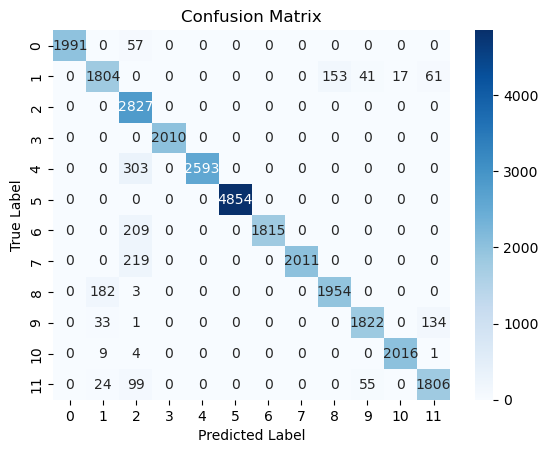

In [39]:
#from cleverhans.future.tf2.attacks import fast_gradient_method
# Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) 
end_time = time.time()
computational_time =  end_time - start_time


y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Computational time: {computational_time:.2f} seconds')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


#plot_confusion_matrix(rf, X_test, y_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
# Add random noise to the features
noise_ratio = 0.7899  # Set the noise ratio to 50%
noise = np.random.normal(0, 0.5, X.shape)  # Increase the standard deviation for more noise
X_noise = X + noise

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_noise, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the classifier's performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


                       precision    recall  f1-score   support

             Backdoor       1.00      0.97      0.99      2048
            DDoS_HTTP       0.87      0.90      0.89      2076
            DDoS_ICMP       0.75      1.00      0.86      2827
             DDoS_TCP       1.00      1.00      1.00      2010
             DDoS_UDP       1.00      0.90      0.94      2896
               Normal       1.00      0.99      1.00      4854
        Port_Scanning       1.00      0.90      0.95      2024
           Ransomware       1.00      0.90      0.95      2230
        SQL_injection       0.95      0.89      0.92      2139
            Uploading       0.97      0.91      0.94      1990
Vulnerability_scanner       0.99      0.99      0.99      2030
                  XSS       0.89      0.93      0.91      1984

             accuracy                           0.95     29108
            macro avg       0.95      0.94      0.94     29108
         weighted avg       0.95      0.95      0.95 